In [10]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize
import nltk

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = open('review.json', 'r')
# review.json has 6685900 enteries of reviews

In [3]:
# from terminal, type: wc review.json to get lines, words, characters summary

In [4]:
stop = 6686900
all_data = []
for i, line in enumerate(file):
    if i%6686900 == 0:
        print(i)
    if i == stop:
        break
    
    data = json.loads(line)
    
    review_id = data['review_id']
    user_id = data["user_id"]
    business_id = data["business_id"]
    stars = data["stars"]
    date = data["date"]
    useful = data["useful"]
    funny = data["funny"]
    cool = data["cool"]
    text = data["text"]
    
    all_data.append([review_id
                    , user_id
                    , business_id
                    , stars
                    , date
                    , useful
                    , funny
                    , cool
                    , text])

df = pd.DataFrame(all_data, columns =["review_id"
                                      , "user_id"
                                      , "business_id"
                                      , "stars"
                                      , "date"
                                      , "useful"
                                      , "funny"
                                      , "cool"
                                      , "text"])

file.close()

0


In [5]:
df_short = df.sample(frac=0.05)

In [7]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334295 entries, 1521953 to 447741
Data columns (total 9 columns):
review_id      334295 non-null object
user_id        334295 non-null object
business_id    334295 non-null object
stars          334295 non-null float64
date           334295 non-null object
useful         334295 non-null int64
funny          334295 non-null int64
cool           334295 non-null int64
text           334295 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 25.5+ MB


In [8]:
pd.to_datetime(df_short.date)

1521953   2014-07-31 18:38:53
4888916   2018-03-18 01:43:03
67772     2017-04-21 02:32:59
5513776   2015-10-19 15:10:48
1633038   2018-06-23 23:38:44
                  ...        
3160170   2018-03-10 18:35:03
1938244   2008-01-03 01:51:10
4057027   2015-09-11 17:05:40
5985539   2018-11-05 04:17:31
447741    2017-04-27 19:59:56
Name: date, Length: 334295, dtype: datetime64[ns]

In [9]:
#stopwords.words('english').append('br')
stopwords_ = set(stopwords.words('english'))
stopwords_.add('br')
stopwords_.add('e')
stopwords_.add('f')
print("--- stopwords in english: {}".format(stopwords_))

--- stopwords in english: {'they', 'what', "hadn't", 'an', 'his', 'now', 'i', 've', 'are', 'mightn', 't', 'should', 'in', "should've", 'under', "haven't", 'until', 'of', 'wouldn', 'during', 'and', 'some', 'where', 'between', 'a', 'that', 'o', 'as', 'mustn', "don't", 'nor', 're', 'few', 'this', "couldn't", 'll', 'doing', 'has', 'd', 'with', 'own', 'if', 'too', "mightn't", 'after', 'because', 'we', 'weren', 's', 'yourselves', "isn't", 'my', 'just', 'them', 'f', 'won', "wouldn't", "hasn't", 'it', 'me', 'which', 'ma', 'herself', 'when', 'any', "you're", 'those', 'why', 'or', 'over', 'ours', 'each', 'for', 'out', 'then', 'all', 'was', 'both', "didn't", 'theirs', 'her', 'did', 'ain', 'him', 'will', 'into', 'she', 'such', 'himself', 'do', 'than', "mustn't", 'be', 'same', 'couldn', 'been', "that'll", 'once', 'through', 'other', 'shouldn', "you've", 'before', 'the', 'm', 'above', "needn't", 'is', 'while', 'aren', 'to', 'he', 'were', "it's", 'haven', "won't", 'hasn', 'e', 'who', 'having', 'again

In [11]:
'thmoas' in stopwords_

False

In [12]:
# WARNING: long process!!!
df_short['text'] = df_short['text'].str.findall(r'([a-z]+)')

In [13]:
# WARNING: long process!!!
df_short['text'] = df_short['text'].apply(lambda x: [item for item in x if item not in stopwords_])

In [14]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [15]:
stemmer_snowball = SnowballStemmer('english') 

In [16]:
# WARNING: long process!!!
df_short['text_stem'] = df_short['text'].apply(lambda x: [stemmer_snowball.stem(y) for y in x])

In [17]:
word_lem = WordNetLemmatizer()

In [18]:
# WARNING: long process!!!
df_short['text_lem'] = df_short['text'].apply(lambda x: [word_lem.lemmatize(y) for y in x])

In [19]:
# WARNING: long process!!!
df_short['text_stem_str'] = df_short['text_stem'].apply(lambda x: " ".join(x))
df_short['text_lem_str'] = df_short['text_stem'].apply(lambda x: " ".join(x))

In [20]:
df_short.head(1)

,review_id,user_id,business_id,stars,date,useful,funny,cool,text,text_stem,text_lem,text_stem_str,text_lem_str
1521953,MyJ0hEkP5dqdzzA_-rceQg,vMYKQeuuC9py7VkRCdAquQ,nSCuDM74ZDk1omtc2KUL0A,1.0,2014-07-31 18:38:53,3,0,1,"[heir, front, office, staff, incompetent, firs...","[heir, front, offic, staff, incompet, first, c...","[heir, front, office, staff, incompetent, firs...",heir front offic staff incompet first call set...,heir front offic staff incompet first call set...


In [21]:
import re
import itertools
import datetime

from collections import Counter

In [27]:
df_short.text_lem_str

1521953    heir front offic staff incompet first call set...
4888916    review realli four star food three star servic...
67772      eri good utter chicken ou decid differ degre s...
5513776    oth fanci solid well prepar breakfast select s...
1633038    becom go hines take fort mill hey fast great p...
                                 ...                        
3160170    hy wait long return place place fun spot aribb...
1938244    ormal write review least tri give establish re...
4057027    eri pleas servic hey arriv estim within promis...
5985539    ur go japanes curri spot drive noth china town...
447741     decor feel bit older one renov kind remind way...
Name: text_lem_str, Length: 334295, dtype: object

In [ ]:
# Below process takes a long time, 20mins!!!

In [30]:
stem_text = df_short.text_stem
stem_words = []

for idx, value in stem_text.items():
    stem_words.append(value)
    
lem_text = df_short.text_lem
lem_words = []

for idx, value in lem_text.items():
    lem_words.append(value)

stem_merged_words = list(itertools.chain.from_iterable(stem_words))
lem_merged_words = list(itertools.chain.from_iterable(lem_words))

stem_word_counts = Counter(word_tokenize('\n'.join(stem_merged_words)))
stem_top_50_review_words = stem_word_counts.most_common(50)

lem_word_counts = Counter(word_tokenize('\n'.join(lem_merged_words)))
lem_top_50_review_words = lem_word_counts.most_common(50)

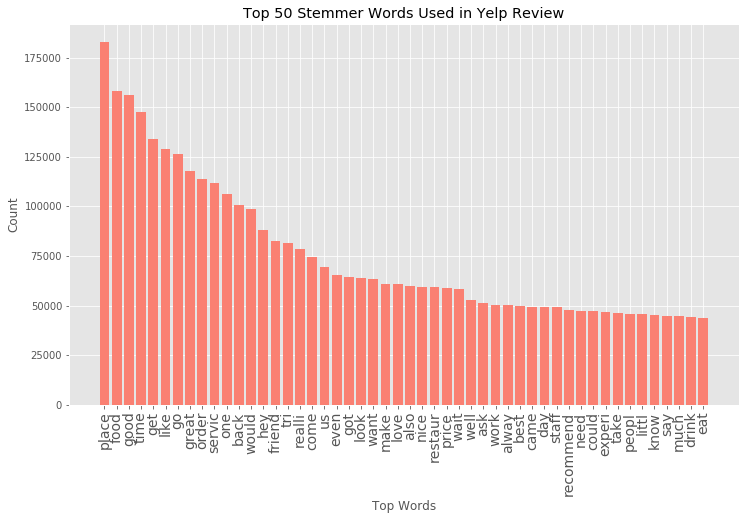

In [32]:
words, counts = zip(*stem_top_50_review_words)
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(words, counts, align='center', color='salmon')
ax.set_xlabel('Top Words')
ax.set_ylabel('Count')
ax.set_title('Top 50 Stemmer Words Used in Yelp Review')
ax.set_xticklabels(words, fontsize = 14, rotation=90);

In [211]:
from wordcloud import WordCloud

In [225]:
df_short.text_stem_str.tolist().join()

AttributeError: 'list' object has no attribute 'join'

In [215]:
worldcloud = WordCloud(width=500, height=400, margin=0).generate(df_short.text_stem_str)

TypeError: expected string or bytes-like object

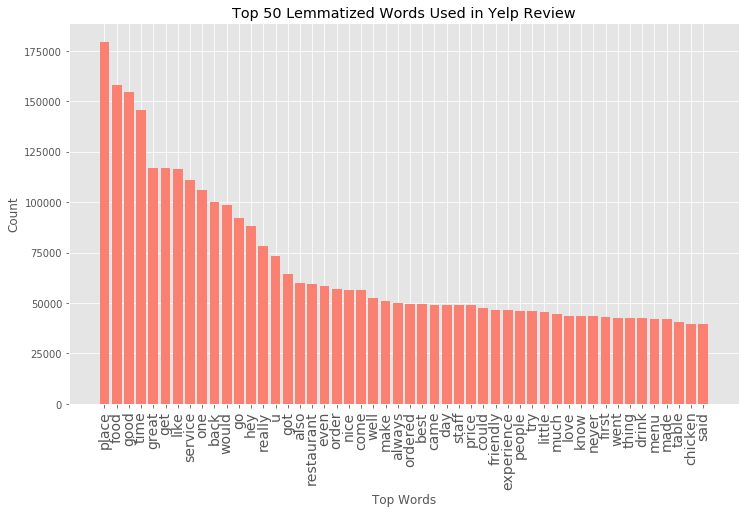

In [33]:
words, counts = zip(*lem_top_50_review_words)
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(words, counts, align='center', color='salmon')
ax.set_xlabel('Top Words')
ax.set_ylabel('Count')
ax.set_title('Top 50 Lemmatized Words Used in Yelp Review')
ax.set_xticklabels(words, fontsize = 14, rotation=90);

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline



In [172]:
from sklearn.preprocessing import label_binarize

#y_test_b = preprocessing.label_binarize(y_test, classes = [1, 2, 3, 4, 5])
#y_train_b = preprocessing.label_binarize(y_train, classes = [1, 2, 3, 4, 5])

In [176]:
y = label_binarize(df_short.stars, classes = [1, 2, 3, 4, 5])

In [184]:
len(y)

334295

In [187]:
from sklearn.multiclass import OneVsRestClassifier

In [189]:
y = label_binarize(df_short.stars, classes = [1, 2, 3, 4, 5])

X_train, X_test, y_train, y_test = train_test_split(df_short.text_stem_str
                                                   , y
                                                   , stratify=y
                                                   , test_size=0.2
                                                   , random_state=0)

tf_vect = TfidfVectorizer(vocabulary='english')
X_train_tf_stem_vect = tf_vect.fit_transform(X_train)

tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_tf_stem_vect)

#NB = MultinomialNB().fit(X_train_tf_stem, y_train)

text_stem_NB = Pipeline([('vect', TfidfVectorizer())
                        , ('tfidf', TfidfTransformer())
                        , ('NB', OneVsRestClassifier(MultinomialNB(fit_prior=True
                                                                  , class_prior=None)))
                        ])

text_stem_NB.fit(X_train, y_train)
predicted = text_stem_NB.predict(X_test)
np.mean(predicted == y_test)

0.8502759538730762

In [195]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

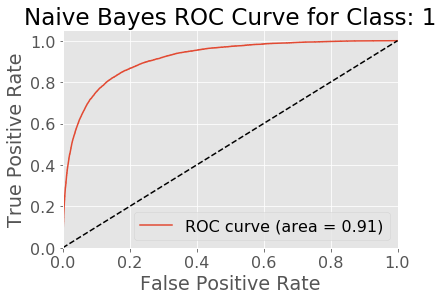

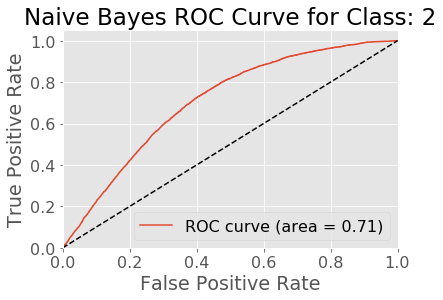

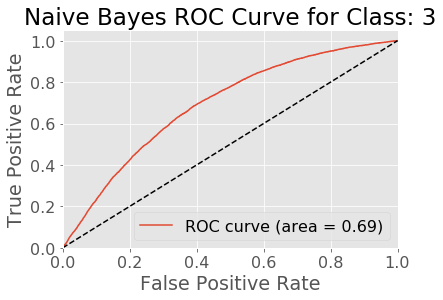

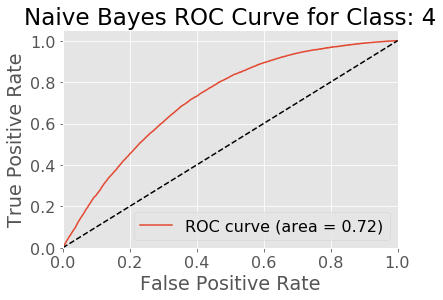

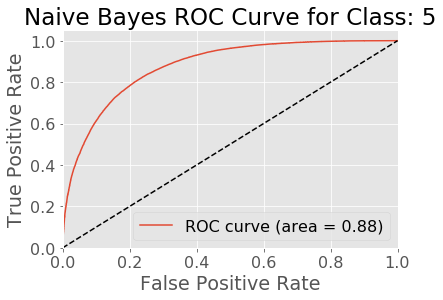

In [202]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], text_stem_NB.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
#fig, axs = plt.subplots(5, figsize=(10,9))
#for i, ax in enumerate(axs.flatten())
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Naive Bayes ROC Curve for Class: {i+1}')
    plt.legend(loc="lower right")
    plt.show();

In [48]:
from sklearn.linear_model import SGDClassifier

In [201]:
from sklearn.calibration import CalibratedClassifierCV

text_stem_SGDC = Pipeline([('vect', TfidfVectorizer())
                        , ('tfidf', TfidfTransformer())
                        , ('GBC', OneVsRestClassifier(SGDClassifier(loss='modified_huber')))
                        ])

text_stem_SGDC.fit(X_train, y_train)
#text_calib_stem_SGDC = CalibratedClassifierCV(text_stem_SGDC, cv='prefit')
#text_calib_stem_SGDC.fit(X_train, y_train)
predicted = text_stem_SGDC.predict(X_test)
np.mean(predicted == y_test)

0.8705394935610763

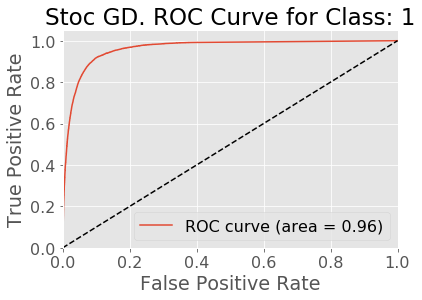

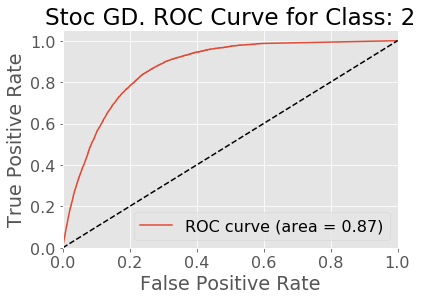

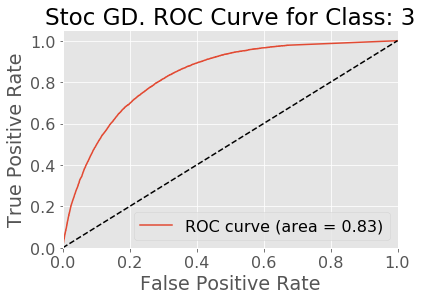

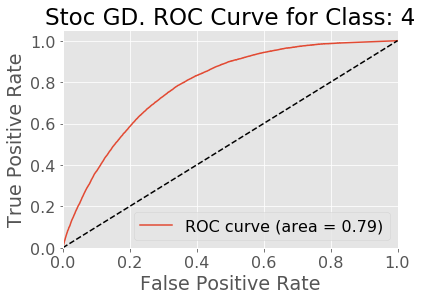

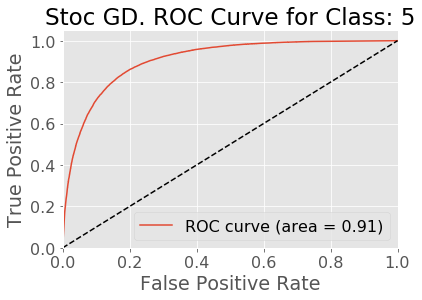

In [205]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], text_stem_SGDC.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
#fig, axs = plt.subplots(5, figsize=(10,9))
#for i, ax in enumerate(axs.flatten())
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Stoc GD. ROC Curve for Class: {i+1}')
    plt.legend(loc="lower right")
    plt.show();

In [170]:
from sklearn.ensemble import AdaBoostClassifier

In [204]:
text_stem_ABC = Pipeline([('vect', TfidfVectorizer())
                        , ('tfidf', TfidfTransformer())
                        , ('ABC', OneVsRestClassifier(AdaBoostClassifier()))
                        ])

text_stem_ABC.fit(X_train, y_train)
predicted = text_stem_ABC.predict(X_test)
np.mean(predicted == y_test)

0.8490554749547555

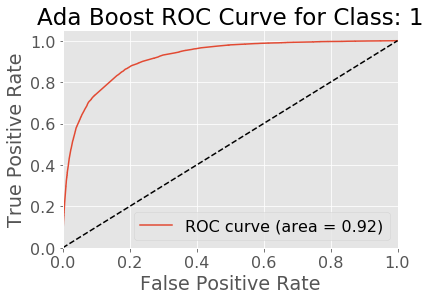

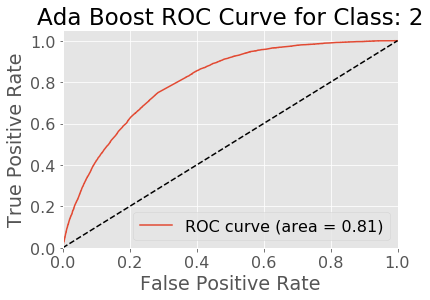

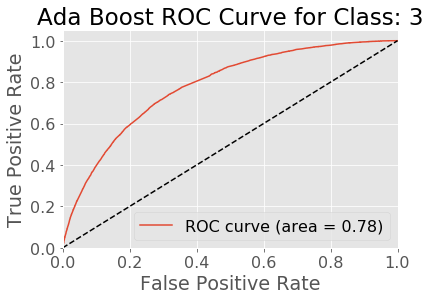

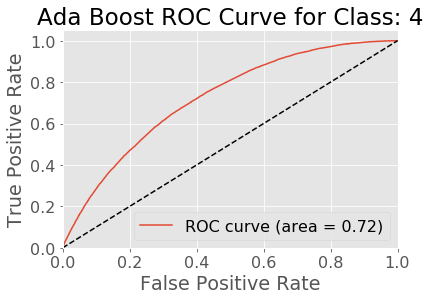

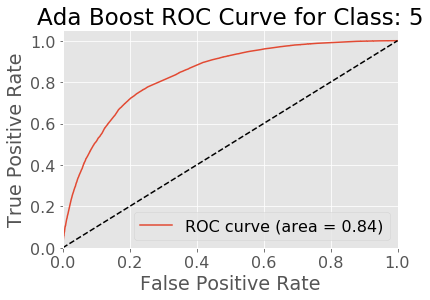

In [206]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], text_stem_ABC.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
#fig, axs = plt.subplots(5, figsize=(10,9))
#for i, ax in enumerate(axs.flatten())
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Ada Boost ROC Curve for Class: {i+1}')
    plt.legend(loc="lower right")
    plt.show();

In [53]:
from sklearn.neural_network import MLPClassifier

In [207]:
# Takes too long!!!
text_stem_MLP = Pipeline([('vect', TfidfVectorizer())
                        , ('tfidf', TfidfTransformer())
                        , ('ABC', OneVsRestClassifier(MLPClassifier()))
                        ])

text_stem_MLP.fit(X_train, y_train)
predicted = text_stem_MLP.predict(X_test)
np.mean(predicted == y_test)

KeyboardInterrupt: 

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], text_stem_MLP.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
#fig, axs = plt.subplots(5, figsize=(10,9))
#for i, ax in enumerate(axs.flatten())
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'MLP ROC Curve for Class: {i+1}')
    plt.legend(loc="lower right")
    plt.show();

In [ ]:
# saving the dataframe 
# df.to_csv('file2.csv', header=False, index=False) 
